In [1]:
import fxcmpy
import pprint as pp
con = fxcmpy.fxcmpy(config_file='fxcm.cfg')
pp.pprint(con.get_candles('EUR/USD', period='H1', number=3, with_index=False).to_dict('records')[::-1])


con.close()


|ERROR|2023-04-25 00:26:05,081|Connection error: {'message': 'Your token is not authorized, please contact admin@fxcm.com'}


ServerError: Can not find FXCM Server.

In [1]:
import fxcmpy
print(fxcmpy.__version__)

1.3.3


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()

Num GPUs Available:  0


False

### get_normalized_periods_fcxm

In [2]:
import kragle.kdb as kdb
import datetime as dt
import pprint as pp

date_start = dt.datetime(2021, 1, 1)
date_end = dt.datetime(2021, 5, 31,)

db = kdb.KragleDB('FX_2020_2021')
v = db.get_normalized_periods_fcxm( periods=['m1', 'm5', 'm30', 'H2', 'H8', 'D1'], history_len=10)
pp.pprint(v)

|WARNING|2023-02-02 16:55:58,010|Default account set to 1342146, to change use set_default_account().


[[[0.40000000000040004, 1.1875],
  [-0.6499999999998174, 1.385],
  [-0.40000000000040004, 1.4225],
  [0.8500000000000174, 1.4175],
  [-1.40000000000029, 1.6825],
  [-0.5999999999994898, 1.2925],
  [0.4499999999996174, 1.7525],
  [-3.4999999999996145, 1.595],
  [-0.0999999999995449, 1.2375],
  [-1.300000000000745, 1.4475]],
 [[5.066666666666553, 1.841],
  [-1.4333333333331015, 1.8965],
  [-7.299999999999715, 1.5445],
  [0.7333333333329566, 1.239],
  [2.2333333333331615, 1.725],
  [-4.833333333333171, 1.195],
  [-0.4333333333332116, 1.074],
  [-1.1666666666669083, 1.2695],
  [-0.80000000000006, 1.512],
  [-3.3666666666665184, 0.1765]],
 [[0.14666666666644326, 0.5018333333333334],
  [-1.706666666666597, 0.52375],
  [-0.4533333333333426, 1.339],
  [0.05333333333338667, 1.2264166666666667],
  [1.9733333333332344, 1.8110833333333334],
  [1.4800000000002218, 2.004],
  [3.6666666666664107, 2.2816666666666667],
  [-0.5466666666663992, 2.2005],
  [5.879999999999737, 1.8726666666666667],
  [0.133

### get_candles

In [3]:
import kragle.kdb as kdb
import datetime as dt
import pprint as pp

date_start = dt.datetime(2020, 1, 22, 23, 50)
date_end = dt.datetime(2020, 1, 22, 23, 59)

db = kdb.KragleDB('FX_2020_GEN_22')
v = db.get_candles('EUR/USD', 'm5', date_end, 2)
pp.pprint(v)

[{'askclose': 1.10961,
  'askhigh': 1.10964,
  'asklow': 1.1095,
  'askopen': 1.1095,
  'bidclose': 1.10955,
  'bidhigh': 1.10958,
  'bidlow': 1.10944,
  'bidopen': 1.10945,
  'date': datetime.datetime(2020, 1, 22, 23, 55),
  'tickqty': 283},
 {'_id': ObjectId('63cb33c63a25a7383d77475d'),
  'askclose': 1.1095,
  'askhigh': 1.10958,
  'asklow': 1.10947,
  'askopen': 1.10948,
  'bidclose': 1.10945,
  'bidhigh': 1.10952,
  'bidlow': 1.10939,
  'bidopen': 1.10942,
  'date': datetime.datetime(2020, 1, 22, 23, 50),
  'tickqty': 164}]


### calc_mean_stddev

In [2]:
import kragle.kdb as kdb
import datetime as dt
import pprint as pp

date_start = dt.datetime(2021, 1, 1)
date_end = dt.datetime(2021, 5, 31,)

db = kdb.KragleDB('FX_2020_2021')
v = db.calc_mean_stddev('EUR/USD', 'm1', date_start, date_end)
pp.pprint(v)

{'bidopen-mean': 0.00011594279860246181,
 'bidopen-stddev': 0.8242580674716756,
 'tickqty-mean': 0.40272353284787743,
 'tickqty-stddev': 0.3762696817328249}


### get_sample

In [1]:
import kragle.kdb as kdb
import datetime as dt
import pprint as pp

date_end = dt.datetime(2021, 1, 5, 14, 57)

db = kdb.KragleDB('FX_2020_2021')
v = db.get_sample(to_date = date_end, n= 5)
pp.pprint(v)

{'date': datetime.datetime(2021, 1, 5, 14, 57),
 'x': [[[1.4999999999998348, 1.1525],
        [-1.9999999999997797, 1.1425],
        [-0.5999999999994898, 0.765],
        [-2.100000000000435, 1.115],
        [-0.2999999999997449, 0.92]],
       [[-0.8666666666664232, 1.0075],
        [-1.1333333333333566, 1.352],
        [-0.3000000000004851, 1.7275],
        [-0.23333333333338166, 1.8015],
        [-0.4666666666660232, 1.331]],
       [[1.4666666666665051, 0.6108333333333333],
        [-0.8133333333333326, 0.873],
        [-0.5199999999998539, 0.6958333333333333],
        [0.10666666666647728, 0.7219166666666667],
        [-1.5333333333333126, 0.6241666666666666]],
       [[-1.3800000000000108, 0.874475],
        [0.7199999999999799, 0.60045],
        [0.9333333333333785, 0.865125],
        [-0.9266666666666682, 0.54995],
        [-0.04666666666667633, 0.35945]],
       [[-0.3266666666666603, 0.7225],
        [0.963333333333353, 0.3125875],
        [-1.8566666666666916, 0.84705625],
 

### duplicate_db

In [3]:
import kragle.kdb as kdb
import datetime as dt
import kragle.utils as kutils

date_start = dt.datetime(2019, 1, 1)
date_end = dt.datetime(2021, 12, 31)

dbname = 'FX_2019_2022'
db = kdb.KragleDB('FX_RAW')
olddb = kdb.KragleDB(dbname)
olddb.drop_db()
newdb = db.duplicate_db(dbname, from_date=date_start, to_date=date_end, fields=kutils.FIELDS)
newdb.get_periods()

['D1', 'H2', 'm1', 'm30', 'm5', 'H8']

## Create Dataset

In [1]:
import kragle.kdb as kdb
import datetime as dt
import pprint as pp


periods=['m1', 'm5', 'm30', 'H2', 'H8']
db = kdb.KragleDB('FX_RAW')

pips=12
limit_future=600

history_len_list=[10]

for history_len in history_len_list:
    print('+++++++++++++++++++++++++++++++++')
    print('>>>>>>>>  history_len {}  <<<<<<<'.format(history_len))
    print('+++++++++++++++++++++++++++++++++')
    
   
#    from_date = dt.datetime(2018, 2, 1)
#    to_date = dt.datetime(2022, 5, 1)
#    print('pips15 train from {} to {}'.format(from_date, to_date))
#    db.create_dataset(  from_date, to_date, 
#                      periods=periods, history_len=history_len, pips=pips, limit_future=limit_future, dtype='train', skip=33)

    from_date = dt.datetime(2022, 6, 2)
    to_date = dt.datetime(2022, 9, 30)
    print('pips15 valid from {} to {}'.format(from_date, to_date))
    db.create_dataset(  from_date, to_date, 
                      periods=periods, history_len=history_len, pips=pips, limit_future=limit_future, dtype='valid', skip=7)

    from_date = dt.datetime(2022, 10, 1)
    to_date = dt.datetime(2022, 12, 1)
    print('pips15 test from {} to {}'.format(from_date, to_date))
    db.create_dataset( from_date, to_date, 
                      periods=periods, history_len=history_len, pips=pips, limit_future=limit_future, dtype='test', skip=7)

print('END')


+++++++++++++++++++++++++++++++++
>>>>>>>>  history_len 10  <<<<<<<
+++++++++++++++++++++++++++++++++
pips15 valid from 2022-06-02 00:00:00 to 2022-09-30 00:00:00
Dataset len: 500  date: 2022-06-06 13:15:00
Dataset len: 1000  date: 2022-06-09 02:47:00
Dataset len: 1500  date: 2022-06-13 16:52:00
Dataset len: 2000  date: 2022-06-16 08:32:00
Dataset len: 2500  date: 2022-06-21 00:31:00
Dataset len: 3000  date: 2022-06-23 13:59:00
Dataset len: 3500  date: 2022-06-28 04:05:00
Dataset len: 4000  date: 2022-06-30 17:34:00
Dataset len: 4500  date: 2022-07-05 08:38:00
Dataset len: 5000  date: 2022-07-07 23:52:00
Dataset len: 5500  date: 2022-07-12 13:53:00
Dataset len: 6000  date: 2022-07-15 05:37:00
Dataset len: 6500  date: 2022-07-19 20:08:00
Dataset len: 7000  date: 2022-07-22 11:46:00
Dataset len: 7500  date: 2022-07-27 03:32:00
Dataset len: 8000  date: 2022-07-29 18:09:00
Dataset len: 8500  date: 2022-08-03 11:00:00
Dataset len: 9000  date: 2022-08-08 03:03:00
Dataset len: 9500  date: 202

### Raw Data from FXCM

In [1]:
import kragle.fxcm_utils as fxutils
import datetime as dt
import logging.config

logging.config.fileConfig('log.cfg')

start = dt.datetime(2023, 2, 1)
end = dt.datetime(2023, 2, 11)


m = fxutils.FxcmManager(dbname='FX_RAW')
m.fetch_instrument(start, end)
m.close()

print('END')


WARNING | Default account set to 1342146, to change use set_default_account().


ConnectionError: ('Connection aborted.', ConnectionResetError(10054, "Connessione in corso interrotta forzatamente dall'host remoto", None, 10054, None))

### Tensorflow

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models


model = models.Sequential()
model.add(layers.Conv2D(32, (1, 3), activation='relu', input_shape=(5, 10, 2), padding='same'))
model.add(layers.Conv2D(32, (3, 1), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(layers.BatchNormalization())


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 5, 10, 32)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 10, 32)         3104      
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 10, 64)         18496     
                                                                 
 dropout (Dropout)           (None, 5, 10, 64)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 10, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [3]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


|ERROR|2023-04-25 00:28:46,071|Connection error: {'message': 'Your token is not authorized, please contact admin@fxcm.com'}


### Compiling Model

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'],
              run_eagerly=True)



### Training Model

In [7]:
import kragle.utils as kutils

accuracy_callback = kutils.AccuracyCallback(valid)
history = model.fit(train_set, train_labels, 
                    epochs=30, 
                    validation_data=valid, 
                    callbacks=[accuracy_callback],
                    class_weight={0:20, 1:1, 2:20})
print('END')

Epoch 1/30
1408/1408 [==============================] - ETA: 0s - loss: 13.3764 - accuracy: 0.4725
	Correct: 8215
	Incorrect: 8286
	0: 0.516
	1: 0.000
	2: 0.486
	Current Network Accuracy: 0.498
1408/1408 [==============================] - 86s 61ms/step - loss: 13.3764 - accuracy: 0.4725 - val_loss: 0.7273 - val_accuracy: 0.4978
Epoch 2/30
1408/1408 [==============================] - ETA: 0s - loss: 13.2363 - accuracy: 0.4876
	Correct: 8163
	Incorrect: 8338
	0: 0.530
	1: 0.000
	2: 0.465
	Current Network Accuracy: 0.495
1408/1408 [==============================] - 86s 61ms/step - loss: 13.2363 - accuracy: 0.4876 - val_loss: 0.7440 - val_accuracy: 0.4947
Epoch 3/30
1408/1408 [==============================] - ETA: 0s - loss: 13.1437 - accuracy: 0.5057
	Correct: 8174
	Incorrect: 8327
	0: 0.393
	1: 0.000
	2: 0.607
	Current Network Accuracy: 0.495
1408/1408 [==============================] - 86s 61ms/step - loss: 13.1437 - accuracy: 0.5057 - val_loss: 0.7361 - val_accuracy: 0.4954
Epoch 4/30

Epoch 26/30
1407/1408 [============================>.] - ETA: 0s - loss: 5.2260 - accuracy: 0.8250
	Correct: 8239
	Incorrect: 8262
	0: 0.488
	1: 0.000
	2: 0.518
	Current Network Accuracy: 0.499
1408/1408 [==============================] - 85s 60ms/step - loss: 5.2262 - accuracy: 0.8249 - val_loss: 1.8084 - val_accuracy: 0.4993
Epoch 27/30
1408/1408 [==============================] - ETA: 0s - loss: 5.1357 - accuracy: 0.8288
	Correct: 8239
	Incorrect: 8262
	0: 0.508
	1: 0.000
	2: 0.496
	Current Network Accuracy: 0.499
1408/1408 [==============================] - 85s 60ms/step - loss: 5.1357 - accuracy: 0.8288 - val_loss: 1.8450 - val_accuracy: 0.4993
Epoch 28/30
1407/1408 [============================>.] - ETA: 0s - loss: 5.0525 - accuracy: 0.8290
	Correct: 8229
	Incorrect: 8272
	0: 0.470
	1: 0.000
	2: 0.535
	Current Network Accuracy: 0.499
1408/1408 [==============================] - 85s 60ms/step - loss: 5.0519 - accuracy: 0.8290 - val_loss: 1.8837 - val_accuracy: 0.4987
Epoch 29/30
1

### Plotting Accuracy

94/94 - 1s - loss: 1.8046 - accuracy: 0.5793 - 624ms/epoch - 7ms/step
0.5792988538742065


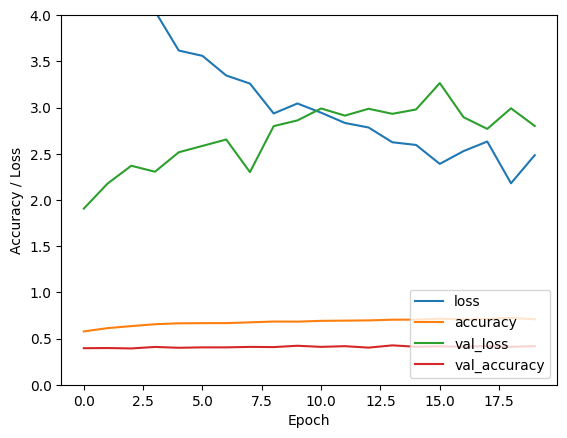

In [18]:
ùimport matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.ylim([0, 4])
plt.legend(loc='lower right')


test_loss, test_acc = model.evaluate(test[0],  test[1], verbose=2)

print(test_acc)

### >>>>>>>>>>>>>>>>>> Dadaset Name <<<<<<<<<<<<<<<<<<

In [2]:
ds_name = 'pips12hist10fut600'

In [8]:
import numpy

import kragle.kdb as kdb
import pprint as pp


db = kdb.KragleDB('Datasets')
test_SELL = db.get_dataset_bytype(ds_name=ds_name, nclass=0, type='test')
test_HOLD = db.get_dataset_bytype(ds_name=ds_name, nclass=1, type='test')
test_BUY =  db.get_dataset_bytype(ds_name=ds_name, nclass=2, type='test')

print('')
print("-----------------------------------------------")
print('Validation')
print("-----------------------------------------------")

print("<<<<< SELL >>>>> (total {})".format(len(test_SELL[0])))
results = model.evaluate(test_SELL[0],test_SELL[1])
print("test loss, test acc:", results)
print("<<<<< HOLD >>>>> (total {})".format(len(test_HOLD[0])))
results = model.evaluate(test_HOLD[0],test_HOLD[1])
print("test loss, test acc:", results)
print("<<<<< BUY >>>>> (total {})".format(len(test_BUY[0])))
results = model.evaluate(test_BUY[0],test_BUY[1])
print("test loss, test acc:", results)

print('')
print("-----------------------------------------------")
print('Validation')
print("-----------------------------------------------")


test_SELL = db.get_dataset_bytype(ds_name=ds_name, nclass=0, type='valid')
test_HOLD = db.get_dataset_bytype(ds_name=ds_name, nclass=1, type='valid')
test_BUY =  db.get_dataset_bytype(ds_name=ds_name, nclass=2, type='valid')

print("<<<<< SELL >>>>> (total {})".format(len(test_SELL[0])))
results = model.evaluate(test_SELL[0],test_SELL[1])
print("test loss, test acc:", results)
print("<<<<< HOLD >>>>> (total {})".format(len(test_HOLD[0])))
results = model.evaluate(test_HOLD[0],test_HOLD[1])
print("test loss, test acc:", results)
print("<<<<< BUY >>>>> (total {})".format(len(test_BUY[0])))
results = model.evaluate(test_BUY[0],test_BUY[1])
print("test loss, test acc:", results)


-----------------------------------------------
Validation
-----------------------------------------------
<<<<< SELL >>>>> (total 3967)
124/124 [==============================] - 2s 13ms/step - loss: 2.0021 - accuracy: 0.5095
test loss, test acc: [2.0021374225616455, 0.5094529986381531]
<<<<< HOLD >>>>> (total 8)
1/1 [==============================] - 0s 29ms/step - loss: 4.3955 - accuracy: 0.0000e+00
test loss, test acc: [4.395530700683594, 0.0]
<<<<< BUY >>>>> (total 4260)
134/134 [==============================] - 2s 12ms/step - loss: 1.8856 - accuracy: 0.5115
test loss, test acc: [1.8856420516967773, 0.5115023255348206]

-----------------------------------------------
Validation
-----------------------------------------------
<<<<< SELL >>>>> (total 8315)
260/260 [==============================] - 3s 13ms/step - loss: 2.1799 - accuracy: 0.4882
test loss, test acc: [2.1799230575561523, 0.48815393447875977]
<<<<< HOLD >>>>> (total 106)
4/4 [==============================] - 0s 12ms

### Save Model

In [17]:
model.save('models/{}'.format(ds_name))

### Load Model

In [7]:
from tensorflow import keras
model = keras.models.load_model('models/{}'.format(ds_name))

### Load Dataset

In [3]:
import numpy

import kragle.kdb as kdb
import pprint as pp
db = kdb.KragleDB('Datasets')
(train_set, train_labels), valid, test = db.get_dataset(ds_name=ds_name)
print(len(train_labels))
pp.pprint((train_labels))

45048
array([0, 0, 2, ..., 0, 2, 2])


In [5]:
import numpy

import kragle.kdb as kdb
import pprint as pp
db = kdb.KragleDB('Datasets')
test_SELL = db.get_dataset_bytype(ds_name=ds_name, nclass=0)
test_HOLD = db.get_dataset_bytype(ds_name=ds_name, nclass=1)
test_BUY = db.get_dataset_bytype(ds_name=ds_name, nclass=2)
print(test_SELL[1])
print(test_HOLD[1])
print(test_BUY[1])


[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
[2 2 2 ... 2 2 2]


### % Percentage %

In [4]:
import kragle.kdb as kdb
import pprint as pp
db = kdb.KragleDB()

s, h, b = db.get_dataset_percentage(ds_name, type='train')
print('TRAIN ---> Sell: {}%   Hold: {}%   Buy: {}%'.format(s*100, h*100, b*100))
s, h, b = db.get_dataset_percentage(ds_name, type='test')
print('TEST  --->Sell: {}%   Hold: {}%   Buy: {}%'.format(s*100, h*100, b*100))
s, h, b = db.get_dataset_percentage(ds_name, type='valid')
print('VALID --->Sell: {}%   Hold: {}%   Buy: {}%'.format(s*100, h*100, b*100))

TRAIN ---> Sell: 47.38945125199787%   Hold: 7.307760610903926%   Buy: 45.302788137098204%
TEST  --->Sell: 48.17243472981178%   Hold: 0.09714632665452339%   Buy: 51.73041894353369%
VALID --->Sell: 50.3908854008848%   Hold: 0.6423853099812132%   Buy: 48.966729289133994%


### Tensor from FXCM

In [36]:
import kragle.kdb as kdb
import pprint as pp

db = kdb.KragleDB(db_name='TensorSave', instrument='EUR/USD', ds_name='Datasets')

    
t= db.fetch_data_tensor_fxcm( periods=['m1', 'm5', 'm30', 'H2', 'H8', 'D1'], history_len=10)
print('Done')

Done


### Predict from live

In [62]:
import kragle.kdb as kdb
import pprint as pp
import numpy

db = kdb.KragleDB(db_name='TensorSave', instrument='EUR/USD', ds_name='Datasets')

t= db.get_data_tensor_fxcm( periods=['m1', 'm5', 'm30', 'H2', 'H8'], history_len=10)
pp.pprint('Done tensor: {}'.format(t))

p = model.predict(numpy.expand_dims(t[0], axis=0))
print(p)

('Done tensor: ([[[0.3500000000000725, 0.34], [-0.20000000000020002, 0.4], '
 '[-0.5499999999991623, 0.2875], [-0.3500000000000725, 0.3875], '
 '[0.04999999999921734, 0.4275], [0.5500000000002725, 0.51], [0.0, 0.3875], '
 '[-0.2999999999997449, 0.4375], [-0.4500000000007276, 0.23], '
 '[-0.4499999999996174, 0.515]], [[-0.3333333333332967, 0.4025], '
 '[-0.60000000000023, 0.4], [0.7000000000001451, 0.5135], '
 '[-1.1333333333333566, 0.472], [-0.8666666666664232, 0.515], '
 '[0.4666666666667633, 0.4265], [0.8333333333328715, 0.6145], '
 '[-1.19999999999972, 0.6355], [0.99999999999989, 0.606], [-1.299999999999635, '
 '0.6725]], [[-0.42666666666650127, 0.5783333333333334], [-1.7866666666668252, '
 '0.6565], [0.5466666666666953, 0.9561666666666667], [-0.09333333333335266, '
 '1.213], [-1.7999999999999496, 1.1630833333333332], [-1.1066666666668112, '
 '1.403], [-0.6799999999997178, 0.77225], [-1.7333333333334384, '
 '0.8343333333333334], [-0.2666666666666373, 0.7675833333333333], '
 '[0.1199

In [52]:
pp.pprint(t)

([[[1.1499999999997623, 0.475],
   [0.7500000000004725, 0.42],
   [0.0, 0.415],
   [0.5500000000002725, 0.425],
   [0.0, 0.515],
   [-0.10000000000065512, 0.3475],
   [-0.14999999999987246, 0.4675],
   [0.6499999999998174, 0.43],
   [-0.20000000000020002, 0.41],
   [0.05000000000032756, 0.2375]],
  [[0.19999999999982995, 0.434],
   [0.6333333333337817, 0.3455],
   [-0.5000000000003151, 0.3945],
   [0.09999999999991498, 0.447],
   [0.5666666666666783, 0.4255],
   [0.1666666666670184, 0.3265],
   [1.0333333333327015, 0.734],
   [0.8999999999999749, 0.7745],
   [-0.09999999999991498, 0.415],
   [0.5333333333338668, 0.429]],
  [[0.8400000000001739, 0.44516666666666665],
   [0.6266666666666273, 0.5261666666666667],
   [-0.6266666666666273, 0.443],
   [-0.49333333333360463, 0.5825833333333333],
   [0.3733333333334106, 0.7151666666666666],
   [-0.7333333333334006, 0.67825],
   [-1.7200000000000177, 0.7730833333333333],
   [1.3200000000000618, 0.8331666666666667],
   [-0.640000000000048, 0.845

In [27]:
pp.pprint(t)


([[[-0.20000000000020002, 0.08],
   [-0.24999999999941735, 0.1275],
   [-0.2999999999997449, 0.4425],
   [0.49999999999994493, 0.2525],
   [-0.2999999999997449, 0.1675],
   [0.0999999999995449, 0.075],
   [0.05000000000032756, 0.08],
   [0.0, 0.165],
   [0.14999999999987246, 0.165],
   [0.14999999999987246, 0.105]],
  [[0.0, 0.1305],
   [-0.5000000000003151, 0.1155],
   [-0.4333333333332116, 0.103],
   [0.06666666666636327, 0.0795],
   [-0.9333333333327866, 0.1815],
   [-0.3333333333332967, 0.235],
   [-0.03333333333355171, 0.115],
   [0.03333333333355171, 0.1555],
   [0.09999999999991498, 0.185],
   [0.4333333333332116, 0.1475]],
  [[0.6933333333331385, 0.20233333333333334],
   [-0.7333333333331046, 0.49416666666666664],
   [-0.7733333333333666, 0.48633333333333334],
   [-0.41333333333337663, 0.67975],
   [-0.5466666666666953, 0.5496666666666666],
   [-0.2666666666666373, 0.7064166666666667],
   [-1.4666666666668011, 0.80225],
   [-0.43999999999992195, 0.6475],
   [0.41333333333337663

### Tensor from DB

In [71]:
import kragle.kdb as kdb
import pprint as pp
import datetime as dt

end = dt.datetime(2023, 2, 10, 21, 57)
db = kdb.KragleDB('FX_RAW')

db.get_data_tensor( periods=['m1', 'm5', 'm30', 'H2', 'H8', 'D1'],to_date=end, history_len=10, normalized=False)

[[[datetime.datetime(2023, 2, 10, 21, 57), 1.06762, 72],
  [datetime.datetime(2023, 2, 10, 21, 56), 1.06762, 122],
  [datetime.datetime(2023, 2, 10, 21, 55), 1.0678, 102],
  [datetime.datetime(2023, 2, 10, 21, 54), 1.06787, 35],
  [datetime.datetime(2023, 2, 10, 21, 53), 1.06781, 33],
  [datetime.datetime(2023, 2, 10, 21, 52), 1.0678, 32],
  [datetime.datetime(2023, 2, 10, 21, 51), 1.06777, 22],
  [datetime.datetime(2023, 2, 10, 21, 50), 1.06771, 95],
  [datetime.datetime(2023, 2, 10, 21, 49), 1.0677, 29],
  [datetime.datetime(2023, 2, 10, 21, 48), 1.06761, 43],
  [datetime.datetime(2023, 2, 10, 21, 47), 1.06761, 10]],
 [[datetime.datetime(2023, 2, 10, 21, 55), 1.0678, 296],
  [datetime.datetime(2023, 2, 10, 21, 50), 1.06771, 217],
  [datetime.datetime(2023, 2, 10, 21, 45), 1.06759, 206],
  [datetime.datetime(2023, 2, 10, 21, 40), 1.06756, 112],
  [datetime.datetime(2023, 2, 10, 21, 35), 1.06766, 99],
  [datetime.datetime(2023, 2, 10, 21, 30), 1.06763, 113],
  [datetime.datetime(2023, 